In [215]:
import alpaca_trade_api as tradeapi
import time
import datetime
from datetime import timedelta
from pytz import timezone
tz = timezone('US/Eastern')

api = tradeapi.REST('PK94G80P5NN2UUXUUU4P',
                    '3GZD6BvehMdzq035j2Ght7XRPCHca5rgAP73cgXC','https://paper-api.alpaca.markets')

import logging
logging.basicConfig(filename='./new_5min_ema.log', format='%(name)s - %(levelname)s - %(message)s')
logging.warning('{} logging started'.format(datetime.datetime.now().strftime("%x %X")))

def get_data_bars(symbols, rate, slow, fast):
    #smoothing_factor = 2/(1+fast)
    data = api.get_barset(symbols, rate, limit=20).df
    for x in symbols:
        data.loc[:, (s, 'fast_sma')] = data[s]['close'].rolling(window=fast).mean()
        data.loc[:, (x, 'slow_sma')] = data[x]['close'].rolling(window=slow).mean()
    return data

def get_signal_bars(symbol_list, rate, ema_slow, ema_fast):
    data = get_data_bars(symbol_list, rate, ema_slow, ema_fast)
    signals = {}
    for x in symbol_list:
        if data[x].iloc[-1]['fast_ema'] > data[x].iloc[-1]['slow_ema']: signal = 1
        else: signal = 0
        signals[x] = signal
    return signals

def time_to_open(current_time):
    if current_time.weekday() <= 4:
        d = (current_time + timedelta(days=1)).date()
    else:
        days_to_mon = 0 - current_time.weekday() + 7
        d = (current_time + timedelta(days=days_to_mon)).date()
    next_day = datetime.datetime.combine(d, datetime.time(9, 30, tzinfo=tz))
    seconds = (next_day - current_time).total_seconds()
    return seconds

def run_checker(stocklist):
    print('run_checker started')
    while True:
        # Check if Monday-Friday
        if datetime.datetime.now(tz).weekday() >= 0 and datetime.datetime.now(tz).weekday() <= 4:
            # Checks market is open
            print('Trading day')
            if datetime.datetime.now(tz).time() > datetime.time(9, 30) and datetime.datetime.now(tz).time() <= datetime.time(15, 30):
                signals = get_signal_bars(stocklist, '5Min', 20, 5)
                for signal in signals:
                    if signals[signal] == 1:
                        #if signal not in [x.symbol for x in api.list_positions()]:
                        logging.warning('{} {} - {}'.format(datetime.datetime.now(tz).strftime("%x %X"), signal, signals[signal]))
                        api.submit_order(signal, 1, 'buy', 'market', 'day')
                        print(datetime.datetime.now(tz).strftime("%x %X"), 'buying', signals[signal], signal)
                    else:
                        try:
                            api.submit_order(signal, 1, 'sell', 'market', 'day')
                            logging.warning('{} {} - {}'.format(datetime.datetime.now(tz).strftime("%x %X"), signal, signals[signal]))
                        except Exception as e:
                            print('No sell', signal, e)
                            pass

                time.sleep(60)
            else:
                # Get time amount until open, sleep that amount
                print('Market closed ({})'.format(datetime.datetime.now(tz)))
                print('Sleeping', round(time_to_open(datetime.datetime.now(tz))/60/60, 2), 'hours')
                time.sleep(time_to_open(datetime.datetime.now(tz)))
        else:
            # If not trading day, find out how much until open, sleep that amount
            print('Market closed ({})'.format(datetime.datetime.now(tz)))
            print('Sleeping', round(time_to_open(datetime.datetime.now(tz))/60/60, 2), 'hours')
            time.sleep(time_to_open(datetime.datetime.now(tz)))

stocks = ['BA','AAPL','DAL','SHOP']

run_checker(stocks)

run_checker started
Trading day


KeyError: 'fast_ema'

In [5]:
import logging
logging.basicConfig(filename='./new_5min_ema.log', format='%(name)s - %(levelname)s - %(message)s')
logging.warning('{} logging started'.format(datetime.datetime.now().strftime("%x %X")))


In [196]:
##### stocks = ['AA','AAPL','AIG','AMAT','AMGN','AMZN','BABA','BAC','BBY','BIDU','BP','C','CAT','CMG',]
data = api.get_barset(stocks, '5Min', limit= 100).df
data

AAPL                                          BA  \
                             open     high      low    close   volume    open   
time                                                                            
2020-05-07 14:30:00-04:00     NaN      NaN      NaN      NaN      NaN     NaN   
2020-05-07 14:35:00-04:00     NaN      NaN      NaN      NaN      NaN     NaN   
2020-05-07 14:40:00-04:00     NaN      NaN      NaN      NaN      NaN     NaN   
2020-05-07 14:45:00-04:00  303.51  303.665  303.260  303.665   8856.0     NaN   
2020-05-07 14:50:00-04:00  303.66  303.680  303.375  303.640   6606.0     NaN   
...                           ...      ...      ...      ...      ...     ...   
2020-05-08 15:40:00-04:00  309.95  310.230  309.950  310.010  18924.0  133.91   
2020-05-08 15:45:00-04:00  310.00  310.120  309.790  309.930  15705.0  133.65   
2020-05-08 15:50:00-04:00  309.97  310.180  309.610  310.140  39375.0  133.61   
2020-05-08 15:55:00-04:00  310.21  310.240  309.870  310.090  18654.0  133.50   
2020-05-08 16:15:00-04:00     NaN      NaN      NaN      NaN      NaN  133.26   

                                                                  DAL          \
                              high      low    close   volume    open    high   
time                                                                            
2020-05-07 14:30:00-04:00      NaN      NaN      NaN      NaN  21.860  21.880   
2020-05-07 14:35:00-04:00      NaN      NaN      NaN      NaN  21.740  21.800   
2020-05-07 14:40:00-04:00      NaN      NaN      NaN      NaN  21.760  21.770   
2020-05-07 14:45:00-04:00      NaN      NaN      NaN      NaN  21.635  21.640   
2020-05-07 14:50:00-04:00      NaN      NaN      NaN      NaN  21.580  21.605   
...                            ...      ...      ...      ...     ...     ...   
2020-05-08 15:40:00-04:00  133.970  133.425  133.730   4648.0  22.670  22.705   
2020-05-08 15:45:00-04:00  133.705  133.520  133.620   5341.0  22.700  22.700   
2020-05-08 15:50:00-04:00  133.720  133.300  133.490  15803.0  22.690  22.730   
2020-05-08 15:55:00-04:00  133.555  133.380  133.405  16148.0  22.675  22.740   
2020-05-08 16:15:00-04:00  133.260  133.260  133.260    100.0     NaN     NaN   

                                                        SHOP           \
                              low   close    volume     open     high   
time                                                                    
2020-05-07 14:30:00-04:00  21.730  21.740   12592.0      NaN      NaN   
2020-05-07 14:35:00-04:00  21.720  21.760    7573.0      NaN      NaN   
2020-05-07 14:40:00-04:00  21.610  21.640   23125.0  727.125  728.365   
2020-05-07 14:45:00-04:00  21.535  21.580   16329.0  728.740  728.740   
2020-05-07 14:50:00-04:00  21.480  21.580   17998.0  727.920  727.920   
...                           ...     ...       ...      ...      ...   
2020-05-08 15:40:00-04:00  22.655  22.690   20198.0  711.590  712.460   
2020-05-08 15:45:00-04:00  22.660  22.685   31394.0  711.810  714.060   
2020-05-08 15:50:00-04:00  22.650  22.675   51821.0  713.625  713.625   
2020-05-08 15:55:00-04:00  22.650  22.720  108661.0  712.210  712.210   
2020-05-08 16:15:00-04:00     NaN     NaN       NaN      NaN      NaN   

                                                     
                               low   close   volume  
time                                                 
2020-05-07 14:30:00-04:00      NaN     NaN      NaN  
2020-05-07 14:35:00-04:00      NaN     NaN      NaN  
2020-05-07 14:40:00-04:00  727.125  728.30    772.0  
2020-05-07 14:45:00-04:00  727.620  727.62   1402.0  
2020-05-07 14:50:00-04:00  727.920  727.92    202.0  
...                            ...     ...      ...  
2020-05-08 15:40:00-04:00  711.590  712.07   4522.0  
2020-05-08 15:45:00-04:00  711.510  713.72   7490.0  
2020-05-08 15:50:00-04:00  710.805  712.65  10404.0  
2020-05-08 15:55:00-04:00  709.820  709.82  17592.0  
2020-05-08 16:15:00-04:00      NaN

In [197]:
s = 'SHOP'
data[s]['close']


time
2020-05-07 14:30:00-04:00       NaN
2020-05-07 14:35:00-04:00       NaN
2020-05-07 14:40:00-04:00    728.30
2020-05-07 14:45:00-04:00    727.62
2020-05-07 14:50:00-04:00    727.92
                              ...  
2020-05-08 15:40:00-04:00    712.07
2020-05-08 15:45:00-04:00    713.72
2020-05-08 15:50:00-04:00    712.65
2020-05-08 15:55:00-04:00    709.82
2020-05-08 16:15:00-04:00       NaN
Name: close, Length: 117, dtype: float64

In [203]:
b =data[s]
b
b.loc[:,'fast_ma'] = 1
b.iloc[1:,-1] = 5*3
b

,open,high,low,close,volume,fast_ma
time,,,,,,
2020-05-07 14:30:00-04:00,NaN,NaN,NaN,NaN,NaN,1
2020-05-07 14:35:00-04:00,NaN,NaN,NaN,NaN,NaN,15
2020-05-07 14:40:00-04:00,727.125,728.365,727.125,728.30,772.0,15
2020-05-07 14:45:00-04:00,728.740,728.740,727.620,727.62,1402.0,15
2020-05-07 14:50:00-04:00,727.920,727.920,727.920,727.92,202.0,15
...,...,...,...,...,...,...
2020-05-08 15:40:00-04:00,711.590,712.460,711.590,712.07,4522.0,15
2020-05-08 15:45:00-04:00,711.810,714.060,711.510,713.72,7490.0,15
2020-05-08 15:50:00-04:00,713.625,713.625,710.805,712.65,10404.0,15


In [214]:
s = 'SHOP'
data = api.get_barset(s, '5Min', limit=100).df
smoothing_factor = 2/(1+5)

data.loc[:, (s, 'fast_sma')] = data[s]['close'].rolling(window=5).mean()
#for i in range(len(data)) : 
data.loc[:4, (s, 'fast_ema')] = None
data.loc[4:, (s, 'fast_ema')] = 1
data.loc[6:, (s, 'fast_ema')] = 1 + data[s]['fast_ema'][-1]
data.loc[:, (s, 'slow_ema')] = data[s]['close'].rolling(window=20).mean()
data

SHOP                                            \
                              open     high      low   close volume fast_sma   
time                                                                           
2020-05-07 14:40:00-04:00  727.125  728.365  727.125  728.30    772      NaN   
2020-05-07 14:45:00-04:00  728.740  728.740  727.620  727.62   1402      NaN   
2020-05-07 14:50:00-04:00  727.920  727.920  727.920  727.92    202      NaN   
2020-05-07 14:55:00-04:00  726.285  727.320  726.285  726.77    764      NaN   
2020-05-07 15:00:00-04:00  726.705  726.705  724.740  725.48   1048  727.218   
...                            ...      ...      ...     ...    ...      ...   
2020-05-08 15:35:00-04:00  712.800  712.970  711.190  711.59   4370  712.633   
2020-05-08 15:40:00-04:00  711.590  712.460  711.590  712.07   4522  712.591   
2020-05-08 15:45:00-04:00  711.810  714.060  711.510  713.72   7490  712.750   
2020-05-08 15:50:00-04:00  713.625  713.625  710.805  712.65  10404  712.604   
2020-05-08 15:55:00-04:00  712.210  712.210  709.820  709.82  17592  711.970   

                                               
                          fast_ema   slow_ema  
time                                           
2020-05-07 14:40:00-04:00      NaN        NaN  
2020-05-07 14:45:00-04:00      NaN        NaN  
2020-05-07 14:50:00-04:00      NaN        NaN  
2020-05-07 14:55:00-04:00      NaN        NaN  
2020-05-07 15:00:00-04:00      1.0        NaN  
...                            ...        ...  
2020-05-08 15:35:00-04:00      2.0  710.67920  
2020-05-08 15:40:00-04:00      2.0  710.88570  
2020-05-08 15:45:00-04:00      2.0  711.18045  
2020-05-08 15:50:00-04:00      2.0  711.35045  
2020-05-08 15:55:00-04:00      2.0  711.35495  

[100 rows x 8 columns]

In [144]:
b = data[s].iloc[20:]

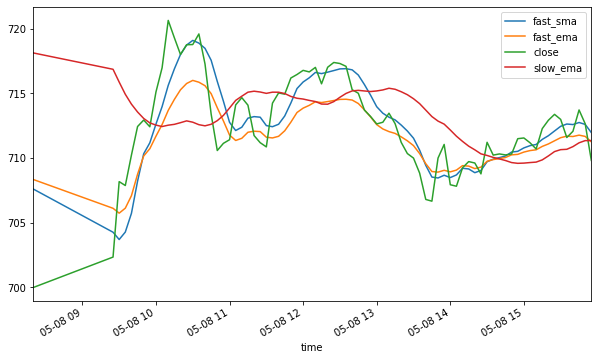

In [147]:
import matplotlib.pyplot as plt
b.plot(y = ['fast_sma','fast_ema','close', 'slow_ema'], figsize = (10,6))

In [40]:
signals = {}
if data['AAPL'].iloc[-1]['fast_ema'] > data['AAPL'].iloc[-1]['slow_ema']: signal = 1
else: signal = 0
signals['AAPL'] = signal
signals

{'AAPL': 1}